In [13]:
import cv2
import skimage
from matplotlib import pyplot as plt
import numpy as np

for img_fn in ["Test_1.png", "Test_2.png"]:
    img = cv2.imread(img_fn)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    co_mat = skimage.feature.graycomatrix(
        img,
        [1],
        [0, np.pi / 4, np.pi / 2, 3 * np.pi / 4],
        256,
        symmetric=True,
        normed=True,
    )

    for stats in ["contrast", "correlation", "energy", "homogeneity"]:
        stats_0_s = skimage.feature.graycoprops(co_mat, stats)
        print(f"{img_fn} {stats} {stats_0_s}")

    # for i in range(co_mat.shape[-1]):
    #     plt.figure()
    #     plt.imshow(co_mat[:, :, 0, i])

Test_1.png contrast [[386.55746621 480.23982751 441.6198783  635.57446548]]
Test_1.png correlation [[0.88586561 0.85827402 0.86970628 0.81243156]]
Test_1.png energy [[0.01162263 0.0110345  0.0112997  0.01048701]]
Test_1.png homogeneity [[0.09440728 0.08520821 0.08941593 0.07731016]]
Test_2.png contrast [[177.81142607 265.34812604 225.6856452  361.30471014]]
Test_2.png correlation [[0.94498377 0.91792143 0.9301985  0.88823968]]
Test_2.png energy [[0.01520116 0.01358255 0.01409427 0.01286741]]
Test_2.png homogeneity [[0.13708597 0.1129716  0.11953037 0.10290238]]


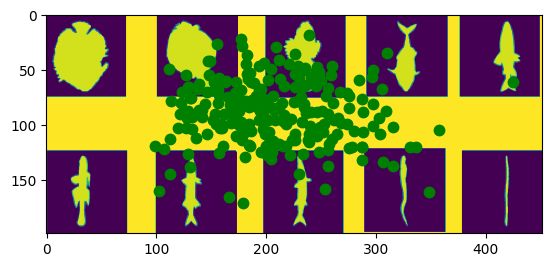

In [25]:
import math

img = cv2.imread("shapes.png")
inverse_img =   cv2.bitwise_not(img)
img = cv2.cvtColor(inverse_img, cv2.COLOR_BGR2GRAY)

regions = skimage.measure.regionprops(img)

plt.imshow(img)
for props in regions:
    y0, x0 = props.centroid
    orientation = props.orientation
    x1 = x0 + math.cos(orientation) * 0.5 * props.axis_minor_length
    y1 = y0 - math.sin(orientation) * 0.5 * props.axis_minor_length
    x2 = x0 - math.sin(orientation) * 0.5 * props.axis_major_length
    y2 = y0 - math.cos(orientation) * 0.5 * props.axis_major_length

    # plt.plot((x0, x1), (y0, y1), '-r', linewidth=2.5)
    # plt.plot((x0, x2), (y0, y2), '-r', linewidth=2.5)
    plt.plot(x0, y0, '.g', markersize=15)

    # minr, minc, maxr, maxc = props.bbox
    # bx = (minc, maxc, maxc, minc, minc)
    # by = (minr, minr, maxr, maxr, minr)
    # plt.plot(bx, by, '-b', linewidth=2.5)
